<a href="https://colab.research.google.com/github/Demesmaeker/DL_computer_vision_Pneumonia/blob/main/00_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from tensorflow.keras import layers, models

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre-Processing


In [4]:
root_dir = "./drive/MyDrive/Collab_datas/"
data_dir = root_dir + "chest_xray/"

training_dir =  data_dir + "train/"
test_dir = data_dir + "test/"
val_dir = data_dir + "val/"

training_dir

'./drive/MyDrive/Collab_datas/chest_xray/train/'

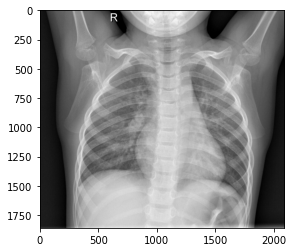

In [5]:
# Show the image
img = cv2.imread(training_dir + "NORMAL/IM-0115-0001.jpeg")
plt.imshow(img)

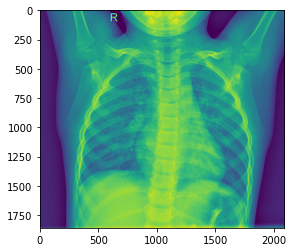

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [7]:
gray

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

In [8]:
gray.max()

255

In [9]:
def list_folders(startpath):
    """Print the folder sutructure of a given folder"""
    
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))

In [10]:
list_folders(training_dir)

/
NORMAL/
PNEUMONIA/


In [11]:
cat = [['NORMAL'],
       ['PNEUMONIA']]

In [12]:
img_size = (150, 150)

In [122]:
x_train = []
y_train = []
 
for i in range(len(cat)):
    print(f'{round(((i + 1) / (len(cat)) * 100))}%')
    for elem in os.listdir(training_dir + cat[i][0]):
        if elem == '.DS_Store':
          continue
        img = cv2.imread(training_dir+cat[i][0]+ "/" + elem)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray colorisationprint(elem)
        img_gray = cv2.resize(img_gray, img_size)
        x_train.append(img_gray)
        y_train.append(i)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


50%
100%


In [123]:
x_test = []
y_test = []
 
for i in range(len(cat)):
    print(f'{round(((i + 1) / (len(cat)) * 100))}%')
    for elem in os.listdir(test_dir + cat[i][0]):
        if elem == '.DS_Store':
          continue
        img = cv2.imread(test_dir+cat[i][0]+ "/" + elem)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray colorisationprint(elem)
        img_gray = cv2.resize(img_gray, img_size)
        x_test.append(img_gray)
        y_test.append(i)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


50%
100%


In [124]:
y_test = y_test.reshape(630, 1)
y_train = y_train.reshape(y_train.shape[0], 1)

In [96]:
x_train.shape

(5216, 150, 150)

In [125]:
x_test = x_test.reshape(630, 150, 150, 1)
x_train = x_train.reshape(x_train.shape[0], 150, 150, 1)

##### generators


In [109]:
def process_data():

  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                                  zoom_range=0.3,
                                                                  vertical_flip=True)

  test_val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

  # This is fed to the network in the specified batch sizes
  train_gen = train_datagen.flow(
    x_train,
    y = y_train, 
    batch_size=32,
    seed=42, 
    shuffle=True)

  test_gen = test_val_datagen.flow(
    x_test,
    y = y_test,  
    batch_size=32)
  
  return x_train, y_train, x_test, y_test

In [126]:
print(x_test)
x_train, y_train, x_test, y_test = process_data()
print(x_test)

[[[[ 12]
   [ 11]
   [ 12]
   ...
   [  7]
   [  8]
   [  8]]

  [[ 12]
   [ 12]
   [ 12]
   ...
   [  4]
   [  6]
   [  6]]

  [[ 11]
   [ 12]
   [ 11]
   ...
   [  2]
   [  3]
   [  4]]

  ...

  [[ 13]
   [ 13]
   [ 12]
   ...
   [ 15]
   [ 16]
   [ 16]]

  [[ 13]
   [ 13]
   [ 13]
   ...
   [ 16]
   [ 14]
   [ 14]]

  [[ 13]
   [ 14]
   [ 13]
   ...
   [ 15]
   [ 17]
   [ 16]]]


 [[[119]
   [127]
   [128]
   ...
   [115]
   [137]
   [199]]

  [[116]
   [118]
   [128]
   ...
   [125]
   [143]
   [208]]

  [[118]
   [117]
   [137]
   ...
   [120]
   [147]
   [204]]

  ...

  [[ 57]
   [ 64]
   [ 55]
   ...
   [190]
   [217]
   [214]]

  [[ 58]
   [ 63]
   [ 59]
   ...
   [186]
   [222]
   [213]]

  [[ 59]
   [ 63]
   [ 59]
   ...
   [189]
   [218]
   [216]]]


 [[[  0]
   [  0]
   [  0]
   ...
   [ 23]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [ 52]
   [ 43]
   [ 23]]

  [[  0]
   [  0]
   [  0]
   ...
   [ 56]
   [ 60]
   [ 58]]

  ...

  [[  0]
   [  0]
   [  0]
   

In [100]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5216, 150, 150, 1) (630, 150, 150, 1) (5216, 1) (630, 1)


In [ ]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=360,
#     horizontal_flip=True,
#     vertical_flip=True,
    
#     ).flow_from_directory(
#         training_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [ ]:
# train_iter = iter(train_datagen)
# train = train_iter.next()
# train

In [ ]:
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
#         test_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [ ]:
# val_datagen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
#         val_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [17]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [16]:
input_size = 100
kernel_size = (5,5)
output_size = len(cat)

In [19]:
np.save(f'./drive/MyDrive/Collab_datas/chest_xray_sets/x_train.npy', x_train)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray_sets/y_train.npy', y_train)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray_sets/x_test.npy', x_test)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray_sets/y_test.npy', y_test)

In [20]:
x_train = np.load(f'./drive/MyDrive/Collab_datas/chest_xray_sets/x_train.npy', allow_pickle=True)
y_train = np.load(f'./drive/MyDrive/Collab_datas/chest_xray_sets/y_train.npy', allow_pickle=True)
x_test = np.load(f'./drive/MyDrive/Collab_datas/chest_xray_sets/x_test.npy', allow_pickle=True)
y_test = np.load(f'./drive/MyDrive/Collab_datas/chest_xray_sets/y_test.npy', allow_pickle=True)

# Model V1 

Img size : 100 x 100

Kernel size : 5 x 5

### Model creation

In [35]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, kernel_size, activation='relu', ))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(output_size, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                495648    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
163/163 [==============================] - 2s 10ms/step - loss: 3.8826 - accuracy: 0.7022 - val_loss: 0.5639 - val_accuracy: 0.7302
Epoch 2/10
163/163 [==============================] - 1s 9ms/step - loss: 0.4313 - accuracy: 0.8169 - val_loss: 0.6659 - val_accuracy: 0.6333
Epoch 3/10
163/163 [==============================] - 1s 8ms/step - loss: 0.4418 - accuracy: 0.7998 - val_loss: 0.5995 - val_accuracy: 0.6286
Epoch 4/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3289 - accuracy: 0.8457 - val_loss: 0.6768 - val_accuracy: 0.8032
Epoch 5/10
163/163 [==============================] - 1s 8ms/step - loss: 0.2603 - accuracy: 0.9021 - val_loss: 0.8359 - val_accuracy: 0.7429
Epoch 6/10
163/163 [==============================] - 1s 9ms/step - loss: 0.2341 - accuracy: 0.9064 - val_loss: 1.5006 - val_accuracy: 0.7286
Epoch 7/10
163/163 [==============================] - 1s 8ms/step - loss: 0.1762 - accuracy: 0.9213 - val_loss: 1.3978 - val_accuracy: 0.7413
Epoch

### Model evaluation

20/20 - 0s - loss: 1.4380 - accuracy: 0.7317


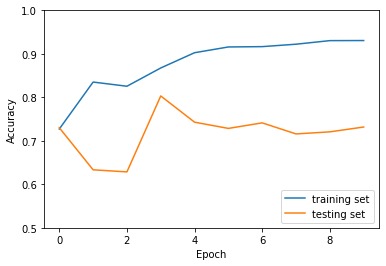

In [37]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 73.17460317460316
That means that out of 630 test samples, this model got 461 correct and 169 incorrect


# Model V2

Img_size : 100 x 100

Kernel size : 3 x 3

### Model creation

In [51]:
kernel_size = (3, 3)

In [52]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, kernel_size, activation='relu', ))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(output_size, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                294928    
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)               

In [53]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
163/163 [==============================] - 2s 9ms/step - loss: 4.4540 - accuracy: 0.7271 - val_loss: 0.5561 - val_accuracy: 0.6190
Epoch 2/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3992 - accuracy: 0.7366 - val_loss: 0.5188 - val_accuracy: 0.6190
Epoch 3/10
163/163 [==============================] - 1s 8ms/step - loss: 0.4057 - accuracy: 0.7301 - val_loss: 0.9130 - val_accuracy: 0.6190
Epoch 4/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3660 - accuracy: 0.7393 - val_loss: 1.1008 - val_accuracy: 0.6587
Epoch 5/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3475 - accuracy: 0.7817 - val_loss: 0.9699 - val_accuracy: 0.7571
Epoch 6/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3330 - accuracy: 0.8009 - val_loss: 1.3638 - val_accuracy: 0.7397
Epoch 7/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3483 - accuracy: 0.7773 - val_loss: 0.8013 - val_accuracy: 0.7778
Epoch 

### Model evaluation

20/20 - 0s - loss: 1.3955 - accuracy: 0.7857


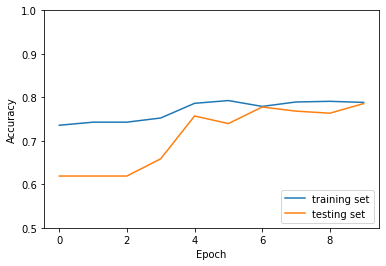

In [54]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 78.57142857142857
That means that out of 630 test samples, this model got 495 correct and 135 incorrect


# Model V3

### Model creation

In [79]:
kernel_size = (3, 3)
input_size = 150

Model pompé d'internet

In [94]:
model = models.Sequential()

model.add(layers.Conv2D(16, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.Conv2D(16, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(32, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(32, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(64, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(64, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(128, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(128, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.SeparableConv2D(256, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(256, kernel_size, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())


model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))


model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 146, 146, 16)      2320      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 73, 73, 16)        0         
_________________________________________________________________
separable_conv2d_45 (Separab (None, 71, 71, 32)        688       
_________________________________________________________________
separable_conv2d_46 (Separab (None, 69, 69, 32)        1344      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
separable_conv2d_47 (Separab (None, 32, 32, 64)      

In [95]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train[:,0], epochs=10, 
                    validation_data=(x_test, y_test[:,0]))

Epoch 1/10
163/163 [==============================] - 11s 59ms/step - loss: 0.6039 - accuracy: 0.7341 - val_loss: 0.6946 - val_accuracy: 0.6190
Epoch 2/10
163/163 [==============================] - 10s 61ms/step - loss: 0.5859 - accuracy: 0.7344 - val_loss: 0.6921 - val_accuracy: 0.6190
Epoch 3/10
163/163 [==============================] - 10s 61ms/step - loss: 0.5789 - accuracy: 0.7380 - val_loss: 0.6807 - val_accuracy: 0.6190
Epoch 4/10
163/163 [==============================] - 10s 60ms/step - loss: 0.4817 - accuracy: 0.7700 - val_loss: 0.4689 - val_accuracy: 0.8159
Epoch 5/10
163/163 [==============================] - 10s 60ms/step - loss: 0.2908 - accuracy: 0.8778 - val_loss: 0.5172 - val_accuracy: 0.8397
Epoch 6/10
163/163 [==============================] - 10s 59ms/step - loss: 0.1874 - accuracy: 0.9317 - val_loss: 0.7643 - val_accuracy: 0.8270
Epoch 7/10
163/163 [==============================] - 9s 55ms/step - loss: 0.1544 - accuracy: 0.9484 - val_loss: 0.6335 - val_accuracy: 

### Model evaluation

20/20 - 0s - loss: 0.6588 - accuracy: 0.8222


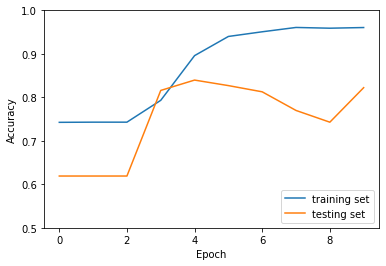

In [96]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test[:,0], verbose=2)

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)

print("Accuracy: %", accuracy_score(y_test[:, 0], np.round(predictions)) * 100)

correct_preds = (y_test[:, 0] == np.round(predictions))
print("That means that out of", y_test[:, 0].shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 82.22222222222221
That means that out of 630 test samples, this model got 222000 correct and 174900 incorrect


In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(x_test)

acc = accuracy_score(y_test[:,0], np.round(preds))*100
cm = confusion_matrix(y_test[:,0], np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[375  15]
 [ 97 143]]

TEST METRICS ----------------------
Accuracy: 82.22222222222221%
Precision: 90.50632911392405%
Recall: 59.583333333333336%
F1-score: 71.85929648241206

TRAIN METRIC ----------------------
Train acc: 96.05


# Model V4

### Model creation

In [21]:
kernel_size = (3, 3)
input_size = 150

Model toujours pompé d'internet

In [111]:
model = models.Sequential()

model.add(layers.Conv2D(16, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.Conv2D(16, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(32, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(32, kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(64, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(64, kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(128, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(128, kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.SeparableConv2D(256, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(256, kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())


model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))


model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 146, 146, 16)      2320      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 73, 73, 16)        0         
_________________________________________________________________
separable_conv2d_88 (Separab (None, 71, 71, 32)        688       
_________________________________________________________________
separable_conv2d_89 (Separab (None, 69, 69, 32)        1344      
_________________________________________________________________
batch_normalization_44 (Batc (None, 69, 69, 32)        128       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 34, 34, 32)      

In [114]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train, epochs=10, 
                    batch_size = 32,
                    validation_data = (x_test, y_test))

Epoch 1/10
163/163 [==============================] - 12s 63ms/step - loss: 0.3827 - accuracy: 0.8040 - val_loss: 1.3288 - val_accuracy: 0.6190
Epoch 2/10
163/163 [==============================] - 10s 62ms/step - loss: 0.1654 - accuracy: 0.9310 - val_loss: 1.2648 - val_accuracy: 0.6190
Epoch 3/10
163/163 [==============================] - 10s 61ms/step - loss: 0.1534 - accuracy: 0.9472 - val_loss: 2.2976 - val_accuracy: 0.6190
Epoch 4/10
163/163 [==============================] - 10s 60ms/step - loss: 0.1024 - accuracy: 0.9612 - val_loss: 2.1677 - val_accuracy: 0.6190
Epoch 5/10
163/163 [==============================] - 10s 60ms/step - loss: 0.0905 - accuracy: 0.9641 - val_loss: 0.8249 - val_accuracy: 0.7571
Epoch 6/10
163/163 [==============================] - 10s 60ms/step - loss: 0.0928 - accuracy: 0.9677 - val_loss: 2.8942 - val_accuracy: 0.6492
Epoch 7/10
163/163 [==============================] - 10s 60ms/step - loss: 0.0791 - accuracy: 0.9738 - val_loss: 0.5327 - val_accuracy:

### Model evaluation

20/20 - 0s - loss: 3.2404 - accuracy: 0.6190


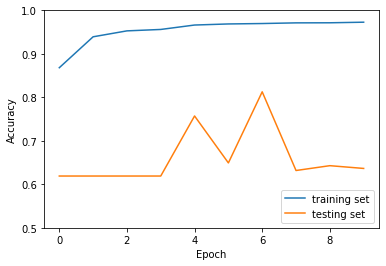

In [115]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_gen, verbose=2)

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)

print("Accuracy: %", round((accuracy_score(y_test, np.round(predictions)) * 100),2))

correct_preds = (y_test == np.round(predictions))

print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "corrects and",
      np.where(~correct_preds)[0].size, "incorrects")

Accuracy: % 63.65
That means that out of 630 test samples, this model got 401 corrects and 229 incorrects


[1. 1. 1. ... 0. 0. 0.]


In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(x_test)

acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[ 11 229]
 [  0 390]]

TEST METRICS ----------------------
Accuracy: 63.650793650793645%
Precision: 63.004846526655896%
Recall: 100.0%
F1-score: 77.30426164519325

TRAIN METRIC ----------------------
Train acc: 97.28


In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(x_test)

acc = accuracy_score(y_test[:,1], np.round(preds))*100
cm = confusion_matrix(y_test[:,1], np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[390   0]
 [232   8]]

TEST METRICS ----------------------
Accuracy: 63.17460317460317%
Precision: 100.0%
Recall: 3.3333333333333335%
F1-score: 6.451612903225808

TRAIN METRIC ----------------------
Train acc: 97.95


# Fresh start

In [ ]:
seed = 232
np.random.seed(seed)
tf.set_random_seed(seed)

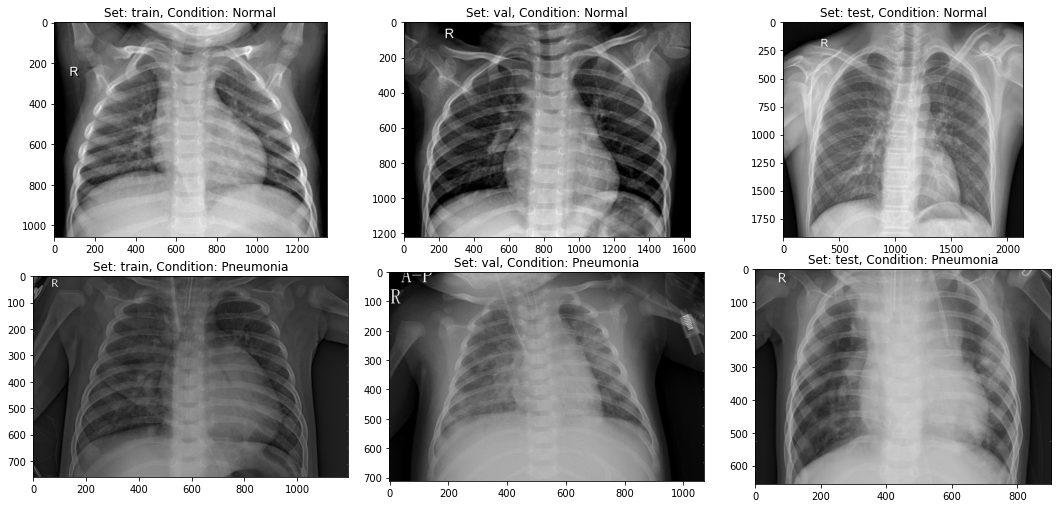

In [127]:
input_path = './drive/MyDrive/Collab_datas/chest_xray/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

In [128]:
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + _set + '/NORMAL'))
    n_infect = len(os.listdir(input_path + _set + '/PNEUMONIA'))
    print('Set: {}, normal images: {}, pneumonia images: {}'.format(_set, n_normal, n_infect))

Set: train, normal images: 1342, pneumonia images: 3876
Set: val, normal images: 9, pneumonia images: 9
Set: test, normal images: 240, pneumonia images: 390


In [131]:
def process_data(img_dims, batch_size):
    # Data generation objects
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
    test_val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    
    # This is fed to the network in the specified batch sizes and image dimensions
    train_gen = train_datagen.flow_from_directory(
    directory=input_path+'train', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)

    test_gen = test_val_datagen.flow_from_directory(
    directory=input_path+'test', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)
    
    # I will be making predictions off of the test set in one batch size
    # This is useful to be able to get the confusion matrix
    test_data = []
    test_labels = []

    for cond in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(input_path + 'test' + cond)):
            img = plt.imread(input_path+'test'+cond+img)
            img = cv2.resize(img, (img_dims, img_dims))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if cond=='/NORMAL/':
                label = 0
            elif cond=='/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    
    return train_gen, test_gen, test_data, test_labels

In [132]:
img_dims = 150
epochs = 10
batch_size = 32

train_gen, test_gen, test_data, test_labels = process_data(img_dims, batch_size)

Found 5216 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


In [141]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf


In [142]:
inputs = Input(shape=(img_dims, img_dims, 3))

# First conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Third conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Fifth conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=1, activation='sigmoid')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [143]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



history = model.fit(train_gen, epochs=10, 
                    batch_size = 32,
                    validation_data = test_gen)

Epoch 1/10
163/163 [==============================] - 84s 507ms/step - loss: 0.4744 - accuracy: 0.7737 - val_loss: 0.7634 - val_accuracy: 0.6190
Epoch 2/10
163/163 [==============================] - 82s 503ms/step - loss: 0.2875 - accuracy: 0.8768 - val_loss: 1.2463 - val_accuracy: 0.6190
Epoch 3/10
163/163 [==============================] - 82s 504ms/step - loss: 0.2473 - accuracy: 0.9014 - val_loss: 1.5495 - val_accuracy: 0.6190
Epoch 4/10
163/163 [==============================] - 82s 503ms/step - loss: 0.2256 - accuracy: 0.9148 - val_loss: 0.8896 - val_accuracy: 0.6190
Epoch 5/10
163/163 [==============================] - 82s 506ms/step - loss: 0.2042 - accuracy: 0.9187 - val_loss: 0.2893 - val_accuracy: 0.9095
Epoch 6/10
163/163 [==============================] - 82s 504ms/step - loss: 0.1803 - accuracy: 0.9359 - val_loss: 0.6414 - val_accuracy: 0.6778
Epoch 7/10
163/163 [==============================] - 82s 505ms/step - loss: 0.1881 - accuracy: 0.9299 - val_loss: 0.8233 - val_ac

In [138]:
print(test_gen)

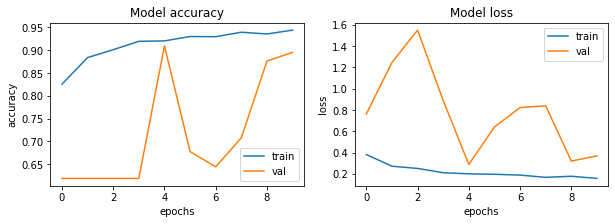

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[187  53]
 [ 13 377]]

TEST METRICS ----------------------
Accuracy: 89.52380952380953%
Precision: 87.67441860465117%
Recall: 96.66666666666667%
F1-score: 91.95121951219512

TRAIN METRIC ----------------------
Train acc: 94.4
